In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import datetime
import warnings
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
warnings.filterwarnings('ignore')

# 1) Sarima Model Optimization

## 1.1) Cleaning the Data

### Saving clean DF

In [4]:
#model_df.to_csv('../data/prices_scores_clean.csv')

In [5]:
#prices_greed_df = pd.merge(prices_df,greed_df,on='date')
#prices_greed_df = prices_greed_df.set_index('date')
#prices_greed_df.to_csv('../data/prices_greed_score_clean.csv')

### Retrieving DF from folder

In [6]:
augmento_df = pd.read_csv('../data/prices_scores_clean.csv')
augmento_df.columns = ['date', 'price', 'BTC_score','twitter_score','reddit_score']
augmento_df['date'] = pd.to_datetime(augmento_df['date'])
augmento_df.columns = ['ds','y','BTC_score', 'twitter_score','reddit_score']
#model_df = model_df.set_index('date')

In [7]:
prices_greed_df = pd.read_csv('../data/prices_greed_score_clean.csv')
#prices_greed_df = prices_greed_df.set_index('date')
prices_greed_df.columns=['date','price','score']
prices_greed_df['date'] = pd.to_datetime(prices_greed_df['date'])
prices_greed_df.columns = ['ds','y','score']

In [8]:
full_df = pd.merge(prices_greed_df, augmento_df, on='ds')

In [9]:
full_df = full_df.drop_duplicates()
full_df = full_df.reset_index()
full_df = full_df[['ds','y_x','score','BTC_score', 'twitter_score','reddit_score']]
full_df.columns = ['ds','y','score','BTC_score', 'twitter_score','reddit_score']

# 2) Facebook Profit (Final Model to deploy)

In [12]:
model = Prophet()
model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
horizon = 30
future = model.make_future_dataframe(horizon)
forecast = model.predict(future)

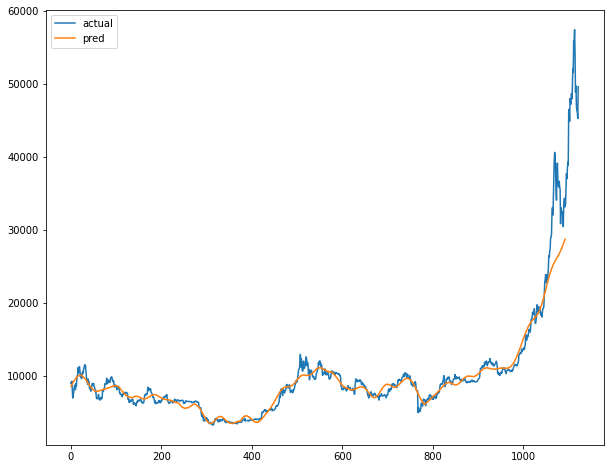

In [14]:
plt.figure(figsize=(10,8))
plt.plot(prices_greed_df["y"], label="actual")
plt.plot(forecast["yhat"], label="pred")
plt.legend()

In [15]:
fg_model = Prophet(interval_width=0.95, weekly_seasonality=True, changepoint_prior_scale=2)
fg_model.add_regressor("score")
fg_model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
horizon = 30
fg_model_future = fg_model.make_future_dataframe(horizon)
fg_model_future["score"] = prices_greed_df["score"] 
fg_forecast = fg_model.predict(fg_model_future)

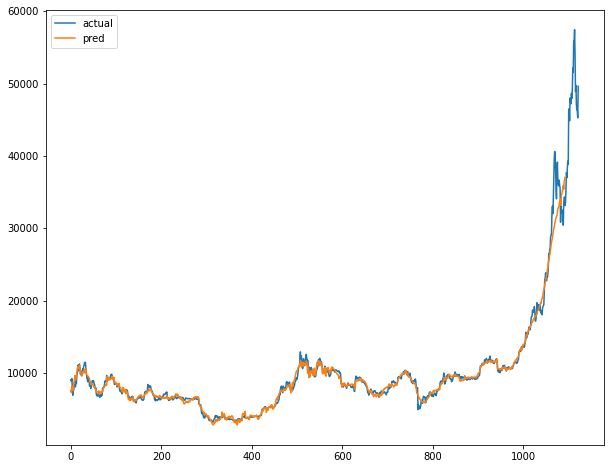

In [17]:
plt.figure(figsize=(10,8))
plt.plot(prices_greed_df["y"], label="actual")
plt.plot(fg_forecast["yhat"], label="pred")
plt.legend()

## Generating predictions DataFrame without scores

In [26]:
start_index_1=500

In [27]:
predictions = {}
for index in range(start_index_1, 1122):
    model = Prophet(interval_width=0.95, weekly_seasonality=True, changepoint_prior_scale=2)
    model.fit(prices_greed_df[:index])
    horizon = 1
    model_future = model.make_future_dataframe(horizon) 
    forecast = model.predict(model_future)
    predictions[forecast['ds'][index]] = forecast['yhat'][index]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [28]:
real_preds = {}
for key, value in predictions.items():
    real_preds[key.strftime('%Y-%m-%d')] = [value]

In [29]:
actuals = prices_greed_df[start_index_1:][['ds','y']]

In [30]:
real_preds = pd.DataFrame(real_preds)
real_preds = real_preds.T
real_preds = real_preds.reset_index()
real_preds.columns = ['ds','pred']
real_preds.ds = pd.to_datetime(real_preds.ds)

In [31]:
comparision = pd.merge(actuals,real_preds, on='ds', how='left')
comparision['mae'] = abs(comparision['y'] - comparision['pred'])
comparision['actual_change'] = comparision['y']-comparision.shift(1)['y']
comparision['pred_change'] = comparision['pred']-comparision.shift(1)['y']
comparision['actual_change'] = np.where(comparision['actual_change']>0,1,0)
comparision['pred_change'] = np.where(comparision['pred_change']>0,1,0)
comparision['correct_pred'] = np.where(comparision['pred_change']==comparision['actual_change'], 1, 0)

In [32]:
comparision['correct_pred'].sum()/len(comparision['correct_pred'])

0.4983922829581994

In [33]:
comparision['mae'].mean()

1096.1259608467442

In [34]:
comparision['previous_price'] = comparision.shift(1)['y']
comparision['previous_pred_change'] = comparision.shift(1)['pred_change']

In [35]:
comparision['future_change'] = comparision.shift(-1)['pred_change']

## Generating predictions DataFrame with scores

In [45]:
start_index = 500

In [46]:
predictions_2 = {}
for index in range(start_index, 1122):
    model = Prophet(interval_width=0.9, weekly_seasonality=True, changepoint_prior_scale=0.5)
    model.add_regressor("score")
    model.fit(prices_greed_df[:index])
    horizon = 1
    model_future = model.make_future_dataframe(horizon)
    model_future["score"] = prices_greed_df["score"] 
    forecast = model.predict(model_future)
    predictions_2[forecast['ds'][index]] = forecast['yhat'][index]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [47]:
real_preds_2 = {}
for key, value in predictions_2.items():
    real_preds_2[key.strftime('%Y-%m-%d')] = [value]

In [48]:
actuals_2 = prices_greed_df[start_index:][['ds','y']]

In [49]:
real_preds_2 = pd.DataFrame(real_preds_2)
real_preds_2 = real_preds_2.T
real_preds_2 = real_preds_2.reset_index()
real_preds_2.columns = ['ds','pred']
real_preds_2.ds = pd.to_datetime(real_preds_2.ds)

In [50]:
comparision_2 = pd.merge(actuals_2,real_preds_2, on='ds', how='left')

In [51]:
comparision_2['mae'] = abs(comparision_2['y'] - comparision_2['pred'])

In [52]:
comparision_2['actual_change'] = comparision_2['y']-comparision_2.shift(1)['y']
comparision_2['pred_change'] = comparision_2['pred']-comparision_2.shift(1)['y']

In [53]:
comparision_2['actual_change'] = np.where(comparision_2['actual_change']>0,1,0)
comparision_2['pred_change'] = np.where(comparision_2['pred_change']>0,1,0)

In [54]:
comparision_2['correct_pred'] = np.where(comparision_2['pred_change']==comparision_2['actual_change'], 1, 0)

In [55]:
comparision_2['correct_pred'].sum()/len(comparision_2['correct_pred'])

0.5353697749196141

In [56]:
comparision_2['mae'].mean()

974.9540944091292

In [57]:
comparision_2['previous_price'] = comparision_2.shift(1)['y']

In [58]:
comparision_2['previous_pred_change'] = comparision_2.shift(1)['pred_change']

In [59]:
comparision_2['future_change'] = comparision_2.shift(-1)['pred_change']

## Generating predictions DataFrame with ALL scores

In [177]:
predictions_3 = {}
for index in range(start_index, 1092):
    model = Prophet(interval_width=0.9, weekly_seasonality=True, changepoint_prior_scale=0.5)
    model.add_regressor("score")
    model.add_regressor("BTC_score")
    model.add_regressor("twitter_score")
    model.add_regressor("reddit_score")
    model.fit(full_df[:index])
    horizon = 1
    model_future = model.make_future_dataframe(horizon)
    model_future["score"] = full_df["score"] 
    model_future["BTC_score"] = full_df["BTC_score"] 
    model_future["twitter_score"] = full_df["twitter_score"] 
    model_future["reddit_score"] = full_df["reddit_score"] 
    forecast = model.predict(model_future)
    predictions_3[forecast['ds'][index]] = forecast['yhat'][index]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [178]:
real_preds_3 = {}
for key, value in predictions.items():
    real_preds_3[key.strftime('%Y-%m-%d')] = [value]

In [179]:
actuals_3 = full_df[start_index_1:][['ds','y']]

In [180]:
real_preds_3 = pd.DataFrame(real_preds_3)
real_preds_3 = real_preds_3.T
real_preds_3 = real_preds_3.reset_index()
real_preds_3.columns = ['ds','pred']
real_preds_3.ds = pd.to_datetime(real_preds_3.ds)

In [181]:
comparision_3 = pd.merge(actuals_3,real_preds_3, on='ds', how='left')
comparision_3['mae'] = abs(comparision_3['y'] - comparision_3['pred'])
comparision_3['actual_change'] = comparision_3['y']-comparision_3.shift(1)['y']
comparision_3['pred_change'] = comparision_3['pred']-comparision_3.shift(1)['y']
comparision_3['actual_change'] = np.where(comparision_3['actual_change']>0,1,0)
comparision_3['pred_change'] = np.where(comparision_3['pred_change']>0,1,0)
comparision_3['correct_pred'] = np.where(comparision_3['pred_change']==comparision_3['actual_change'], 1, 0)

In [182]:
comparision_3['previous_price'] = comparision_3.shift(1)['y']
comparision_3['previous_pred_change'] = comparision_3.shift(1)['pred_change']

In [183]:
comparision_3['future_change'] = comparision_3.shift(-1)['pred_change']

In [184]:
comparision_3['correct_pred'].sum()/len(comparision_3['correct_pred'])

0.4991568296795953

In [185]:
comparision_3['mae'].mean()

929.349091916679

## Testing Wallet

In [150]:
def wallet(budget, df, start='2019-06-19', end='2021-03-01'):
    start = df[df['ds']==start].index[0]
    end = df[df['ds']==end].index[0]
    new_df = df[start:end]
    
    cash = budget
    btc_value = 0
    
    portfolio_value = []
    transaction_dates = []
    for index, row in new_df.iterrows():
        
        if row['future_change']==1:   
            if cash==0:
                pass
            
            else:
                btc_value = (cash/row['y'])

                transaction_dates.append(row['ds'])
        
                portfolio_value.append(cash)
                cash = 0
                
                
        if row['future_change']==0 and btc_value>0: 
            cash = btc_value*row['y']
            btc_value = 0
            portfolio_value.append(cash)
            transaction_dates.append(row['ds'])
    
    if cash == 0: 
        portfolio = btc_value*df[end:]['y'][end]
        return (portfolio, portfolio_value, transaction_dates)
    else:       
        return (cash, portfolio_value, transaction_dates)

In [187]:
wallet(100, comparision_3, end='2021-01-31')

(185.2650199994372,
 [100,
  103.90951811589862,
  103.90951811589862,
  79.38346891255483,
  79.38346891255483,
  75.90807136466518,
  75.90807136466518,
  78.18800479088443,
  78.18800479088443,
  81.46846906033015,
  81.46846906033015,
  71.08528782679693,
  71.08528782679693,
  77.20436528651203,
  77.20436528651203,
  87.00904571895316,
  87.00904571895316,
  91.4338347573213,
  91.4338347573213,
  103.49978617243015,
  103.49978617243015,
  101.85536563977044,
  101.85536563977044,
  102.95453929071634,
  102.95453929071634,
  100.66667874785334,
  100.66667874785334,
  102.1344545736549,
  102.1344545736549,
  102.4025815693559,
  102.4025815693559,
  104.65153042589802,
  104.65153042589802,
  112.94099722058851,
  112.94099722058851,
  119.33815977284947,
  119.33815977284947,
  123.89546730835102,
  123.89546730835102,
  129.07850185875319,
  129.07850185875319,
  115.66865072061394,
  115.66865072061394,
  120.09117701168043,
  120.09117701168043,
  125.33794474326133,
  125

In [189]:
wallet(100, comparision_2)

(503.09365038624213,
 [100,
  110.16715582337096,
  110.16715582337096,
  127.15439982563481,
  127.15439982563481,
  117.3457479644684,
  117.3457479644684,
  121.82973342089312,
  121.82973342089312,
  120.0573545420193,
  120.0573545420193,
  122.52968790732908,
  122.52968790732908,
  117.91049684603298,
  117.91049684603298,
  118.79193214145053,
  118.79193214145053,
  125.36175689488498,
  125.36175689488498,
  125.65516960242624,
  125.65516960242624,
  131.8666304304005,
  131.8666304304005,
  124.71618236744041,
  124.71618236744041,
  137.34333021117826,
  137.34333021117826,
  153.3798923091738,
  153.3798923091738,
  158.56288275833654,
  158.56288275833654,
  169.43088883076274,
  169.43088883076274,
  185.66171696887645,
  185.66171696887645,
  187.41353518817425,
  187.41353518817425,
  197.99900376457632,
  197.99900376457632,
  197.60273678943457,
  197.60273678943457,
  221.72205761672086,
  221.72205761672086,
  249.4363653802591,
  249.4363653802591,
  248.99665869

In [158]:
wallet(100,comparision, start='2020-01-01', end='2020-03-05')

(93.64654713106935,
 [100,
  103.00354545337659,
  103.00354545337659,
  107.3251731939712,
  107.3251731939712,
  93.64654713106935],
 [Timestamp('2020-02-02 00:00:00'),
  Timestamp('2020-02-05 00:00:00'),
  Timestamp('2020-02-10 00:00:00'),
  Timestamp('2020-02-11 00:00:00'),
  Timestamp('2020-02-13 00:00:00'),
  Timestamp('2020-03-02 00:00:00')])

In [200]:
wallet(100, comparision_3, end='2021-01-31')

(185.2650199994372,
 [100,
  103.90951811589862,
  103.90951811589862,
  79.38346891255483,
  79.38346891255483,
  75.90807136466518,
  75.90807136466518,
  78.18800479088443,
  78.18800479088443,
  81.46846906033015,
  81.46846906033015,
  71.08528782679693,
  71.08528782679693,
  77.20436528651203,
  77.20436528651203,
  87.00904571895316,
  87.00904571895316,
  91.4338347573213,
  91.4338347573213,
  103.49978617243015,
  103.49978617243015,
  101.85536563977044,
  101.85536563977044,
  102.95453929071634,
  102.95453929071634,
  100.66667874785334,
  100.66667874785334,
  102.1344545736549,
  102.1344545736549,
  102.4025815693559,
  102.4025815693559,
  104.65153042589802,
  104.65153042589802,
  112.94099722058851,
  112.94099722058851,
  119.33815977284947,
  119.33815977284947,
  123.89546730835102,
  123.89546730835102,
  129.07850185875319,
  129.07850185875319,
  115.66865072061394,
  115.66865072061394,
  120.09117701168043,
  120.09117701168043,
  125.33794474326133,
  125

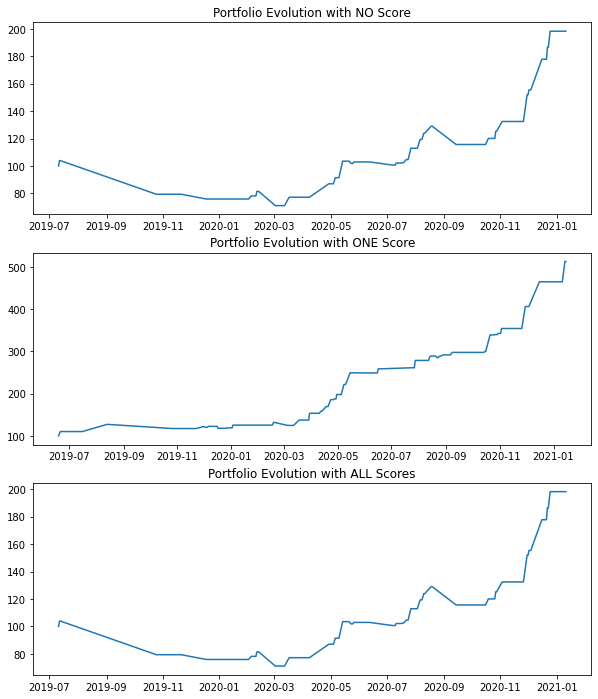

In [224]:
fig, ax = plt.subplots(3,1,figsize=(10,12))
ax[0].plot(wallet(100, comparision, end='2021-01-31')[2],wallet(100, comparision, end='2021-01-31')[1])
ax[0].set_title('Portfolio Evolution with NO Score')
ax[1].plot(wallet(100, comparision_2, end='2021-01-31')[2],wallet(100, comparision_2, end='2021-01-31')[1])
ax[1].set_title('Portfolio Evolution with ONE Score')
ax[2].plot(wallet(100,comparision_3, end='2021-01-31')[2],wallet(100,comparision_3, end='2021-01-31')[1])
ax[2].set_title('Portfolio Evolution with ALL Scores')
plt.show()

In [161]:
#comparision_2.to_csv('../data/predictions_fear_greed_score.csv')

In [164]:
#comparision.to_csv('../data/predictions_no_score.csv')

In [225]:
#comparision_3.to_csv('../data/predictions_all_scores.csv')

## Plotting

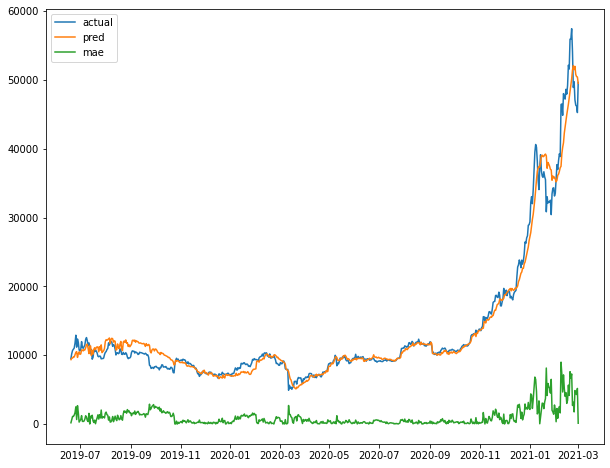

In [139]:
plt.figure(figsize=(10,8))
plt.plot(comparision_2[1:]['ds'],comparision_2[1:]['y'], label='actual')
plt.plot(comparision_2[1:]['ds'],comparision_2[1:]['pred'], label='pred')
plt.plot(comparision_2[1:]['ds'],comparision_2[1:]['mae'], label='mae')
plt.legend()
plt.show()

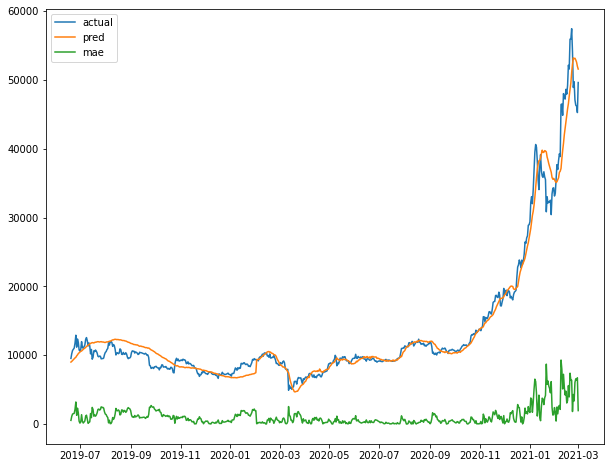

In [140]:
plt.figure(figsize=(10,8))
plt.plot(comparision[1:]['ds'],comparision[1:]['y'], label='actual')
plt.plot(comparision[1:]['ds'],comparision[1:]['pred'], label='pred')
plt.plot(comparision[1:]['ds'],comparision[1:]['mae'], label='mae')
plt.legend()
plt.show()